# Machine Learning- Naive Bayes: Digit Classification and Classifying genuine and forged banknotes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Section 1 - Digit Classification with Naive Bayes

## Data Processing

Loading data into pandas dataframe object

In [5]:
# Load data (digits) & labels as pandas dataframe object
df = pd.read_csv("smalldigits.csv", header=None)
df = df.sample(frac=1, random_state=42, axis=0)  # Randomise dataframe
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
1245,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,1,0,6
220,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,9
1518,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
438,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,7
1270,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
1294,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,7
860,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,1,0,0,2
1459,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,7


#### Created 90/10 train test split and convert to numpy arrays

In [6]:
n_rows = df.shape[0]
# Roughly 90/10 train-test split
train_digits = df.iloc[:int(n_rows * 0.9), :-1].to_numpy()
train_labels = df.iloc[:int(n_rows * 0.9), -1].to_numpy()

print("train_digits: \n", train_digits)
print("\ntrain_labels: \n", train_labels)

train_digits: 
 [[0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]]

train_labels: 
 [6 9 3 ... 8 0 4]


In [7]:
test_digits = df.iloc[int(n_rows * 0.9):, :-1].to_numpy()
test_labels = df.iloc[int(n_rows * 0.9):, -1].to_numpy()

print("test_digits: \n", test_digits)

print("\ntest_labels: \n", test_labels)

test_digits: 
 [[0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

test_labels: 
 [9 5 0 5 3 6 9 1 1 8 4 0 9 2 6 9 8 6 8 7 1 5 7 2 8 0 8 8 6 7 0 9 3 8 2 0 2
 1 7 4 3 1 4 2 8 2 5 3 8 5 5 5 8 1 5 3 1 1 9 1 4 4 4 3 5 6 8 2 5 7 5 1 5 7
 9 9 2 7 1 9 0 9 3 7 5 9 0 3 5 1 1 5 0 0 5 0 4 1 2 2 6 8 8 0 3 4 3 3 8 4 0
 6 0 2 3 3 2 1 0 0 4 0 0 1 8 2 0 4 1 5 6 8 0 3 9 8 2 8 4 0 6 4 1 0 0 1 2 9
 7 0 8 6 3 9 2 4 4 8 3 8 0 0 6 8 5 4 6 5 7 1 4 4 5 2 4 3 7 2 7 1]


**Note:**
- `train_digits` - train features
- `train_labels` - train labels
- `test_digits` - test features
- `test_labels` - test labels

### Helper Functions

`vis_digit` can be used to visualise a given digit. This may be useful for debugging and/or your understanding.

Label = 9


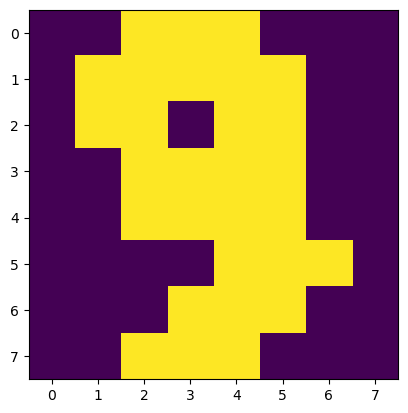

In [9]:
def vis_digit(digit):
    plt.imshow(digit.reshape(8, 8), cmap="viridis")

print(f"Label = {train_labels[1]}")
vis_digit(train_digits[1])

## Learning

#### Computed the **prior** probabilities for each class. These values are stored in the numpy array `priors`, with the prior for label 0 being at index 0 of the `priors`, label 1 being at index 1 and so on.


In [34]:
priors = np.zeros(10)

totalSize=len(train_labels)

for outputClass in train_labels:
    priors[outputClass]=priors[outputClass]+1
    
for j in range(len(priors)):
    priors[j]=priors[j]/totalSize
# TODO

priors


array([0.09461967, 0.0995671 , 0.09833024, 0.10265925, 0.10018553,
       0.10018553, 0.10451453, 0.10327767, 0.09400124, 0.10265925])

#### Comput the class conditionals with Laplacian smoothing and and assign their values to the numpy array `class_conditionals`. Set `k = 1`.

In [38]:
class_conditionals = np.zeros((10, 64))  # 10 classes, 64 features
k = 1

for outputClass in range(len(priors)):
    

    for feature in range(len(train_digits[0])):

        totalFeature=0
        trueCondition=0
        
        for j in range(len(train_digits)):
            if train_labels[j]==outputClass:
                totalFeature+=1
                if train_digits[j][feature]==1:
                    trueCondition+=1

        class_conditionals[outputClass][feature]=(trueCondition+k)/(totalFeature+2)


# TODO

class_conditionals[:2]

array([[0.00645161, 0.00645161, 0.4       , 0.99354839, 0.9483871 ,
        0.2516129 , 0.00645161, 0.00645161, 0.00645161, 0.04516129,
        0.97419355, 0.98064516, 0.93548387, 0.94193548, 0.08387097,
        0.00645161, 0.00645161, 0.36129032, 0.98064516, 0.42580645,
        0.18064516, 0.9483871 , 0.32258065, 0.00645161, 0.00645161,
        0.61935484, 0.98064516, 0.19354839, 0.00645161, 0.86451613,
        0.79354839, 0.00645161, 0.00645161, 0.71612903, 0.96129032,
        0.08387097, 0.00645161, 0.83225806, 0.81290323, 0.00645161,
        0.00645161, 0.33548387, 0.98709677, 0.15483871, 0.1483871 ,
        0.93548387, 0.61290323, 0.00645161, 0.00645161, 0.01935484,
        0.98709677, 0.90967742, 0.89677419, 0.96129032, 0.20645161,
        0.00645161, 0.00645161, 0.00645161, 0.41935484, 0.99354839,
        0.98064516, 0.52903226, 0.02580645, 0.00645161],
       [0.00613497, 0.00613497, 0.2392638 , 0.72392638, 0.83435583,
        0.50306748, 0.09202454, 0.00613497, 0.00613497, 0.0

#### Visualise class conditionals 
***Below, for each class I will be plotting the associated probabilities of each pixel (i.e. features).The plots below are supposed to vaguelly look like the associated label if not then there was an in issue with how I calculated the class conditionals***


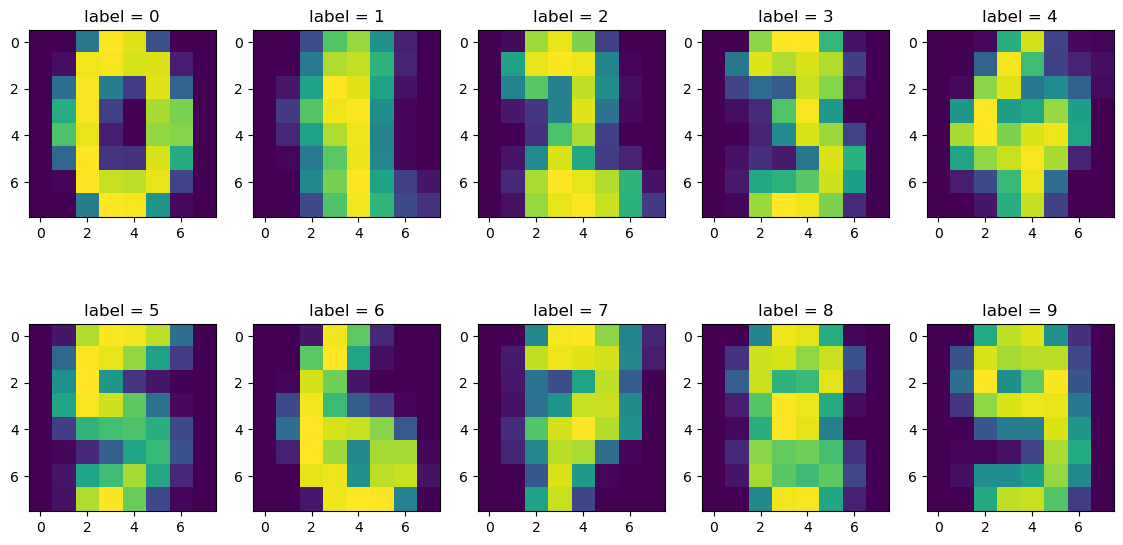

In [39]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 5, figsize=(14, 7))  # 1 row, 2 columns
for j in range(5):
    axes[0][j].imshow(class_conditionals[j].reshape(8, 8), cmap="viridis")
    axes[0][j].set_title(f"label = {j}")

for j in range(5):
    axes[1][j].imshow(class_conditionals[j+5].reshape(8, 8), cmap="viridis")
    axes[1][j].set_title(f"label = {j+5}")

## Inference

#### Impleted the function `calc_posterior` that computes $P(C|X)$, where $C$=`label` and $X$=`features`.
- `features`: $x$

In [50]:
def calc_posterior(features):
    # Calc P(C|X) for each C
    p_c_x=np.zeros(10)

    probFeatures=0 

    for outputClass in range(len(priors)):
        condProbability=1
        featureCount=0
        for feature in features:
            if feature==1:
               condProbability*=class_conditionals[outputClass][featureCount]
            
            else:
                condProbability*=(1-class_conditionals[outputClass][featureCount])
            featureCount+=1

        p_c_x[outputClass]=condProbability
        probFeatures+=condProbability*priors[outputClass]

    for i in range(len(p_c_x)):
        p_c_x[i]=(p_c_x[i]*priors[i])/(probFeatures)
        

    #feat_class_conds = np.ones(10)  # feat_class_conds[0] corresponds to P(X|C=0)
    # TODO:calc p_c_x

    return p_c_x


print(f"Posterior probs for digit = {calc_posterior(test_digits[0])}")

Posterior probs for digit = [7.41275769e-08 6.06280296e-13 1.36081782e-13 6.19382130e-06
 5.01667002e-13 1.07228487e-05 6.93584632e-18 3.26578166e-11
 1.52315371e-07 9.99982857e-01]


test_digits[0]:


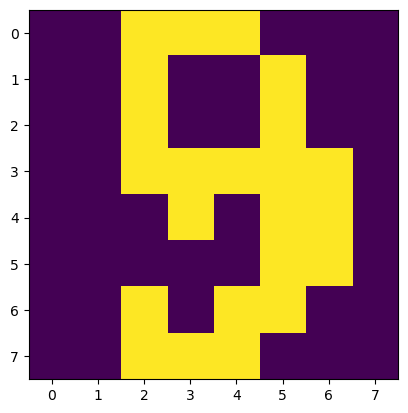

In [51]:
print("test_digits[0]:")
vis_digit(test_digits[0])

#### implement the function `infer_class` that infers/predicts the most probable class for the given data `digit`.

In [52]:
def infer_class(digit):
    # TODO
    pred_label = 0
    currValue=0
    results=calc_posterior(digit)

    for result in range(len(results)):
        if results[result]>currValue:
            currValue=results[result]
            pred_label=result

    return pred_label

infer_ind = 0
print(f"Predicted label = {infer_class(test_digits[infer_ind])}; True label = {test_labels[infer_ind]}")

Predicted label = 9; True label = 9


test_digits[0]:


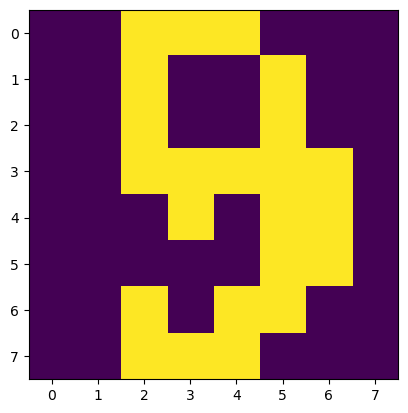

In [53]:
print(f"test_digits[{infer_ind}]:")
vis_digit(test_digits[infer_ind])

#### Creating a confusion matrix using the test set

[[25.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 13.  1.  0.  0.  0.  1.  0.  2.  2.]
 [ 0.  1. 13.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  3. 17.  0.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0. 18.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0. 19.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0. 12.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  1.  0. 20.  0.]
 [ 0.  4.  0.  0.  0.  1.  0.  0.  0. 10.]]


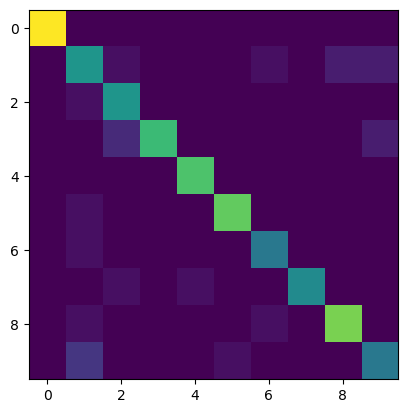

In [55]:
confusion_matrix = np.zeros((10, 10))

for getDigits in range(len(test_digits)):

    predictedValue=infer_class(test_digits[getDigits])
    actualValue=test_labels[getDigits]


    confusion_matrix[predictedValue][actualValue] +=1






print(confusion_matrix)
plt.imshow(confusion_matrix)  # Plot heatmap of confusion_matrix

#### Computing the accuracy 

In [56]:

diagonalSum=0
for j in range(len(confusion_matrix)):
    diagonalSum+=confusion_matrix[j][j]

acc = diagonalSum/len(test_labels)

print(f"Accuracy = {acc*100}%")

Accuracy = 87.22222222222223%


# Section 2 - Naive Bayes with Continuous Features

The file `banknote_authentication.csv` contains 100 examples of genuine (class=1) and forged (class=0) banknotes. These images were analysed with a wavelet transform tool that generated four continuous features: variance, skewness, curtosis and entropy (of each image). The goal is that each feature in both classes, we must fit a Gaussian distribution to that feature and use this to make the predictions.

In [74]:
bank_df = pd.read_csv("banknote_authentication.csv", sep=";")
bank_df = bank_df.sample(frac=1, random_state=42)  # Randomise
bank_df

,variance,skewness,curtosis,entropy,class
83,0.50813,0.47799,-1.980400,0.57714,1
53,-3.84830,-12.80470,15.682400,-1.28100,1
70,-0.34810,-0.38696,-0.478410,0.62627,1
45,-0.78690,9.56630,-3.786700,-7.50340,0
44,2.85610,6.91760,-0.793720,0.48403,0
...,...,...,...,...,...
60,-2.41150,-9.13590,9.344400,-0.65259,1
71,0.47368,3.36050,-4.506400,-4.04310,1
14,3.40400,8.72610,-2.991500,-0.57242,0
92,-0.28015,3.07290,-3.385700,-2.91550,1


## Data Analysis & Visualisation

### Plotting 8 seperate histograms: one for each variable for each class. These plots must be rendered in the provided matlotlib axes (`axs`). The top row correspond to `class=0` and the bottom row correspond to `class=1`. For each plot I set the title of the axis to have the format `class={class}-{feature_name}`.



In [76]:
# If using seaborn uncomment the below and run
 #!pip install seaborn
import seaborn as sns
sns.set()

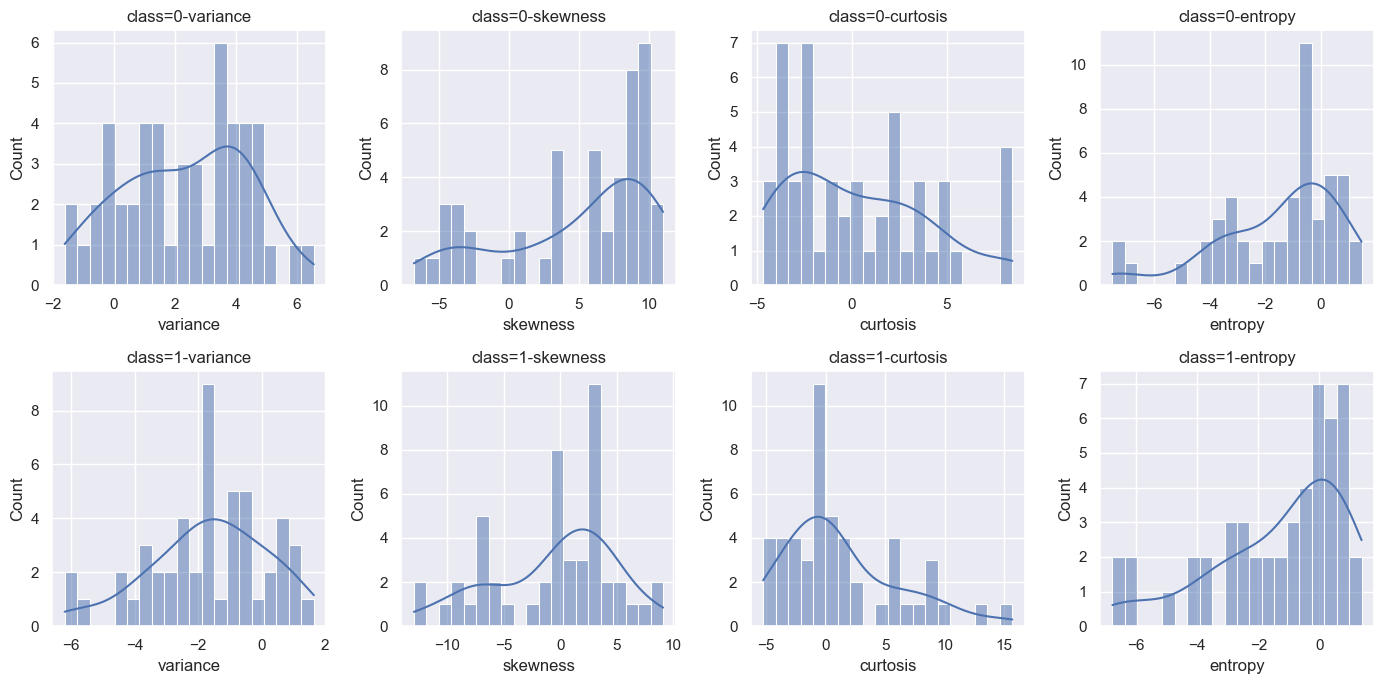

In [77]:
fig, axs = plt.subplots(2, 4, figsize=(14, 7)) # Don't remove

features = ["variance", "skewness", "curtosis", "entropy"]
for i, feature in enumerate(features):
    # Class 0 (Top row)
   
    sns.histplot(bank_df[bank_df["class"] == 0][feature], ax=axs[0, i], bins=20, kde=True)
    axs[0, i].set_title(f"class=0-{feature}")

    # Class 1 (Bottom row)
    sns.histplot(bank_df[bank_df["class"] == 1][feature], ax=axs[1, i], bins=20, kde=True)
    axs[1, i].set_title(f"class=1-{feature}")

# TODO

fig.tight_layout()  # Don't remove

#### Comments on the plots

The distributions of the features approximately follow a Gaussian distribution, as seen by the bell shape of the histograms. This means the Gaussian Naive Bayes assumption is reasonably valid, so the model should work well. However, since the histograms are not perfect bell curves, the predictions might not be completely accurate and could be slightly off.

## Training

#### Train-Test Split

First create an 80-20 train-test split. Note that we first randomised the dataframe so the data is already randomised.

In [78]:
split_index = int(bank_df.shape[0] * 0.8)

print("#########")
print("# TRAIN #")
print("#########")
s2_train_features = bank_df.iloc[:split_index, :-1].to_numpy()
s2_train_labels = bank_df.iloc[:split_index, -1].to_numpy()

print(f"first ten rows of s2_train_features = \n {s2_train_features[:10]}")
print(f"\nfirst ten elements of s2_train_labels = \n {s2_train_labels[:10]}")

print("\n########")
print("# TEST #")
print("########")
s2_test_features = bank_df.iloc[split_index:, :-1].to_numpy()
s2_test_labels = bank_df.iloc[split_index:, -1].to_numpy()

print(f"first ten rows of s2_test_features = \n {s2_test_features[:10]}")
print(f"\nfirst ten elements of s2_test_labels = \n {s2_test_labels[:10]}")

#########
# TRAIN #
#########
first ten rows of s2_train_features = 
 [[  0.50813   0.47799  -1.9804    0.57714]
 [ -3.8483  -12.8047   15.6824   -1.281  ]
 [ -0.3481   -0.38696  -0.47841   0.62627]
 [ -0.7869    9.5663   -3.7867   -7.5034 ]
 [  2.8561    6.9176   -0.79372   0.48403]
 [  3.4805    9.7008   -3.7541   -3.4379 ]
 [  3.9362   10.1622   -3.8235   -4.0172 ]
 [ -2.7338    0.45523   2.4391    0.21766]
 [  1.2247    8.7779   -2.2135   -0.80647]
 [  3.6216    8.6661   -2.8073   -0.44699]]

first ten elements of s2_train_labels = 
 [1 1 1 0 0 0 0 1 0 0]

########
# TEST #
########
first ten rows of s2_test_features = 
 [[-0.36506  2.8928  -3.6461  -3.0603 ]
 [ 1.6408   4.2503  -4.9023  -2.6621 ]
 [ 3.6289   0.81322  1.6277   0.77627]
 [ 4.8906  -3.3584   3.4202   1.0905 ]
 [ 4.5459   8.1674  -2.4586  -1.4621 ]
 [-1.6677  -7.1535   7.8929   0.96765]
 [ 0.3292  -4.4552   4.5718  -0.9888 ]
 [ 3.866   -2.6383   1.9242   0.10645]
 [ 0.93584  8.8855  -1.6831  -1.6599 ]
 [-3.2238   2.79

### Calculating the class priors and set them to the numpy array `s2_priors`. Element 0 of the array correspond to class=0.

In [85]:
s2_priors = np.zeros(2)
totalBankNote=len(s2_train_labels)
totalOnes=0
totalzeros=0

for outputClass in s2_train_labels:
    if outputClass==0:
        totalzeros+=1
    else:
        totalOnes+=1

s2_priors[0]=totalzeros/totalBankNote
s2_priors[1]=totalOnes/totalBankNote


# TODO

s2_priors


array([0.525, 0.475])

### Class Conditionals
For this section for each feature $x_i$ and class $c$ I fit a gaussian distribution to the associated data and implemented the function `s2_class_conditional_fn`. Computed the mean ($\mu_{x_i, c}$) and variance ($\sigma^2_{x_i, c}$)  without the built-in functions for each $(x_i, c)$

Stored these values in the numpy arrays `s2_cc_mean` for the means, and `s2_cc_var` for the variance. The rows of these arrays correspond to features, and the columns correspond to classes. Note: $x_0$="variance", $x_1$="skewness", $x_2$="curtosis" and $x_3$="entropy". $c_0$=0 and $c_1$=1.


The format of `s2_cc_mean` is as follows:
`s2_cc_mean` = </br>
\[ </br>
&emsp; \[$\mu_{x_0, c_0}$, $\mu_{x_1, c_0}$, $\mu_{x_2, c_0}$, $\mu_{x_3, c_0}$],</br>
&emsp; \[$\mu_{x_0, c_1}$, $\mu_{x_1, c_1}$, $\mu_{x_2, c_1}$, $\mu_{x_3, c_1}$] </br>
]

The format of `s2_cc_var` follows similarly.


In [67]:
s2_cc_mean = np.zeros((2, 4))


for i in range(len(s2_train_features[0])):
    nZeros=0
    nOnes=0
    for featureIndex in range(len(s2_train_features)):
        if s2_train_labels[featureIndex]==0:
        
            s2_cc_mean[0][i]=s2_cc_mean[0][i]+s2_train_features[featureIndex][i]
            nZeros+=1

        else:
            s2_cc_mean[1][i]=s2_cc_mean[1][i]+s2_train_features[featureIndex][i]
            nOnes+=1

   
    s2_cc_mean[0][i]=s2_cc_mean[0][i]/nZeros
    s2_cc_mean[1][i]=s2_cc_mean[1][i]/nOnes




# TODO

s2_cc_mean

array([[ 2.11768924,  5.20368119,  0.34544714, -1.74017955],
       [-1.82843   , -0.68951058,  1.54479248, -1.21049189]])

In [68]:
s2_cc_var = np.zeros((2,4))

for i in range(len(s2_train_features[0])):
    nZeros=0
    nOnes=0
   
    for featureIndex in range(len(s2_train_features)):
        if s2_train_labels[featureIndex]==0:

            s2_cc_var[0][i]=s2_cc_var[0][i]+(s2_train_features[featureIndex][i]-s2_cc_mean[0][i])**2           
            nZeros+=1

        else:
            s2_cc_var[1][i]=s2_cc_var[1][i]+(s2_train_features[featureIndex][i]-s2_cc_mean[1][i])**2           
            nOnes+=1

    s2_cc_var[0][i]=s2_cc_var[0][i]/nZeros
    s2_cc_var[1][i]=s2_cc_var[1][i]/nOnes

# TODO

s2_cc_var

array([[ 4.02932591, 26.38644283, 15.08515814,  5.05878121],
       [ 3.16089597, 28.14452811, 22.27090384,  4.84683954]])

### Implementing the function `s2_class_conditional_fn` which will compute $P(x_i | c)$. This function takes in the feature, class (class_label), mean and variance (var).
- `feature`: $x_i$
- `class_label`: $c$
- `mean`: mean ($\mu_{x_i, c}$) of associated gaussian distribution for $(x_i, c)$
- `var`: variance ($\sigma^2_{x_i, c}$) of associated gaussian distribution for $(x_i, c)$

In [86]:
def s2_class_conditional_fn(feature, class_label, mean, var):



    cond_prob =  ( 1/np.sqrt( 2*(np.pi)*var ) )*( np.exp( ( -(feature-mean)**2 )/( 2*var ) ) )
    

    return cond_prob

tmp_feature = s2_train_features[0, 0]
#print(tmp_feature)
# tmp_class = 0
print(f"P(x_0={tmp_feature}|c={0}) = {s2_class_conditional_fn(tmp_feature, 0, s2_cc_mean[0, 0], s2_cc_var[0, 0])}")
print(f"P(x_0={tmp_feature}|c={1}) = {s2_class_conditional_fn(tmp_feature, 1, s2_cc_mean[0, 1], s2_cc_var[0, 1])}")


P(x_0=0.50813|c=0) = 0.14410453742602167
P(x_0=0.50813|c=1) = 0.051141559173017714


### Posterior Probability

##### Implementing the function `s2_calc_posterior` that calculates the posterior probability of a given class based off given data. I.e. $P(c|x)$.
- `feature`: $x$
- `class_label`: $c$

In [87]:
def s2_calc_posterior(class_label, feature):
  
    pClassLabel=s2_priors[class_label]
    pClassLabel2=0

    postFeatures=1
    postFeatures2=1

    for someFeature in range(len(feature)):
        postFeatures=postFeatures*s2_class_conditional_fn(feature[someFeature],class_label,s2_cc_mean[class_label][someFeature],s2_cc_var[class_label][someFeature])

    if class_label==1:
        class_label2=0
        pClassLabel2=s2_priors[0]
        for someFeature in range(len(feature)):
            postFeatures2=postFeatures2*s2_class_conditional_fn(feature[someFeature],class_label2,s2_cc_mean[class_label2][someFeature],s2_cc_var[class_label2][someFeature])
        

    else:
        class_label2=1
        pClassLabel2=s2_priors[1]
        for someFeature in range(len(feature)):
            postFeatures2=postFeatures2*s2_class_conditional_fn(feature[someFeature],class_label2,s2_cc_mean[class_label2][someFeature],s2_cc_var[class_label2][someFeature])


    

    post_prob = (postFeatures*pClassLabel)/(postFeatures*pClassLabel+postFeatures2*pClassLabel2)
    # TODO

    return post_prob

# Don't change
print(f"P(c=0 | x={s2_test_features[0]}) = {s2_calc_posterior(0, s2_test_features[0])}")
print(f"P(c=1 | x={s2_test_features[0]}) = {s2_calc_posterior(1, s2_test_features[0])}")



P(c=0 | x=[-0.36506  2.8928  -3.6461  -3.0603 ]) = 0.5355873388487656
P(c=1 | x=[-0.36506  2.8928  -3.6461  -3.0603 ]) = 0.4644126611512343


## Predict Class
Implementing the function `s2_infer_class`. Which should return the most probable class for the given data.

In [88]:
def s2_infer_class(feature):
    answer=1
    forClass0=s2_calc_posterior(0,feature)
    forClass1=s2_calc_posterior(1,feature)

    if forClass0>forClass1:
        answer=0

    c = answer

    
    return c

print(f"Inferred class for x={s2_test_features[0]} = {s2_infer_class(s2_test_features[0])}")

Inferred class for x=[-0.36506  2.8928  -3.6461  -3.0603 ] = 0


## Confusion Matrix & Accuracy
Computing the confusion matrix using the test set

[[7. 5.]
 [1. 7.]]


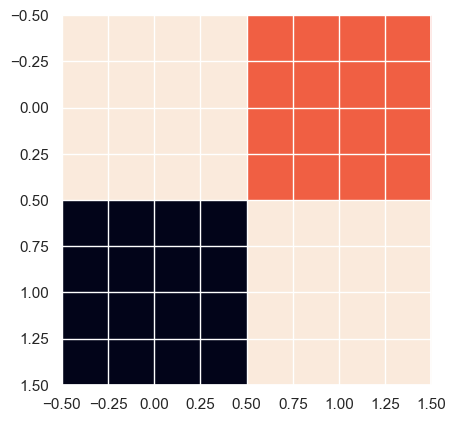

In [72]:
s2_confusion_matrix = np.zeros((2, 2))

for feature in range(len(s2_test_features)):

    predictedValue=s2_infer_class(s2_test_features[feature])
    actualValue=s2_test_labels[feature]
    s2_confusion_matrix[predictedValue][actualValue] +=1

# TODO

# Don't modify
print(s2_confusion_matrix)
plt.imshow(s2_confusion_matrix)  # Plot heatmap of confusion_matrix

##### Computing the accuracy of the model

In [73]:

diagonalSum=0
for j in range(len(s2_confusion_matrix)):
    diagonalSum+=s2_confusion_matrix[j][j]

s2_acc = diagonalSum/len(s2_test_labels)

# TODO

print(f"Accuracy = {s2_acc*100}%")

Accuracy = 70.0%
